# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2


# Import your own code
from inauguralproject import ExchangeEconomyClass

# Question 1 - Edgeworth box

Using two for-loops, the utility of both A and B are looped through all possible combinations of good bundles where x1A + x1B = 1 and x2A + x2B = 1.
All good bundles that gives both consumers at least the same utility as their endowment are plotted in the Edgeworth box

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


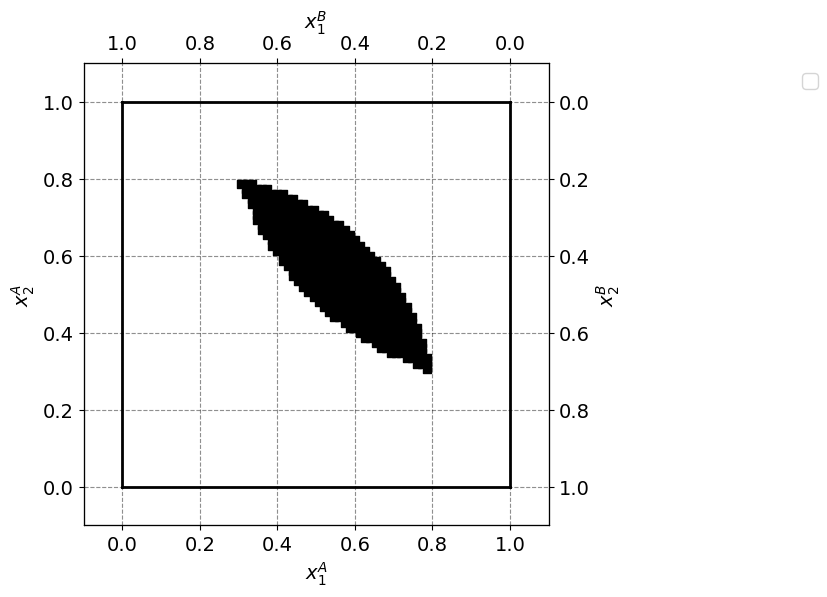

In [6]:
model = ExchangeEconomyClass()
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A Plotting the exchange lens in the Edgeworth box
N = 75
for i in range(N+1):
    x1A = i/N
    for j in range(N+1):
        x2A = j/N
        if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A) and model.utility_B(1-x1A, 1-x2A) >= model.utility_B(par.w1B, par.w2B):
            ax_A.scatter(x1A,x2A,marker='s',color='black')
    


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2 - Market clearing error

Still using N = 75, I let the for-loop run until i = 150, setting the final p1 = 0.5 + 150/75 = 2.5
The function check_market_equilibrium is printed out for all p1

In [24]:
for i in range (2*N+1):
    p1 = 0.5 + i/N
    print(model.check_market_clearing(p1))


(0.533333333333333, -0.2666666666666666)
(0.503896103896104, -0.2586666666666665)
(0.47594936708860747, -0.25066666666666654)
(0.4493827160493825, -0.24266666666666653)
(0.42409638554216855, -0.23466666666666652)
(0.3999999999999999, -0.22666666666666646)
(0.3770114942528735, -0.2186666666666665)
(0.3550561797752807, -0.21066666666666645)
(0.33406593406593377, -0.2026666666666665)
(0.3139784946236557, -0.19466666666666654)
(0.2947368421052629, -0.18666666666666654)
(0.27628865979381423, -0.17866666666666642)
(0.2585858585858586, -0.1706666666666664)
(0.2415841584158414, -0.16266666666666652)
(0.22524271844660193, -0.1546666666666665)
(0.20952380952380933, -0.1466666666666666)
(0.19439252336448576, -0.1386666666666665)
(0.17981651376146773, -0.1306666666666665)
(0.16576576576576557, -0.12266666666666659)
(0.15221238938053072, -0.11466666666666647)
(0.13913043478260856, -0.10666666666666658)
(0.12649572649572638, -0.09866666666666646)
(0.11428571428571421, -0.09066666666666645)
(0.102479

# Question 3 - Finding market clearing price

The function find_equilibrium takes in a guess for p1. The function finds the demand for good 1 and 2 given the p1 guess. If the guess does not make the excess demand for good 1 go close to 0, the price is increased by some fraction of the excess demand until the price equals 0 excess demand OR when the function has iterated 500 times

In [37]:
p1_guess = 0.5
model.find_equilibrium(p1_guess)

374: p1 =   0.94444289 -> excess demand for good 1->     0.00000099
374: p1 =   1.00000000 -> excess demand for good 2->    -0.00000093


ADD CONCISE CONLUSION.